# **Problem 1: Part b**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

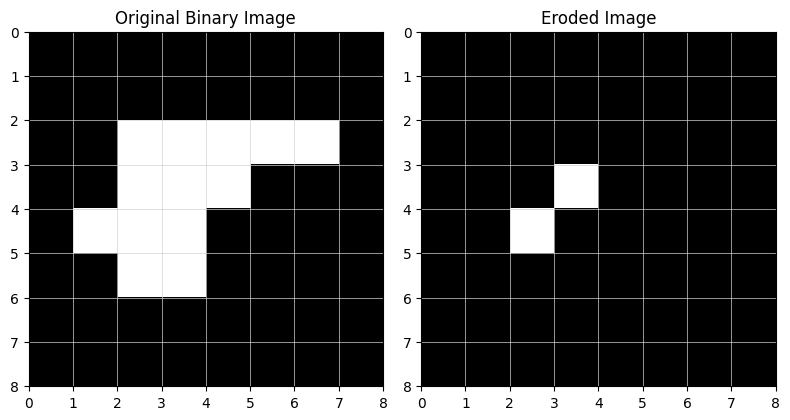

In [2]:
# Define binary imageز
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])

# Define structuring element
structuring_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])


output = np.zeros_like(image)
image_h, image_w = image.shape
se_h, se_w = structuring_element.shape
pad_h, pad_w = se_h // 2, se_w // 2

# Apply Erosion operation 
for i in range(pad_h, image_h - pad_h):
    for j in range(pad_w, image_w - pad_w):
        match = True
        for m in range(se_h):
            for n in range(se_w):
                if structuring_element[m, n] == 1:
                    ni = i + m - pad_h
                    nj = j + n - pad_w
                    if image[ni, nj] != 1:
                        match = False
                        break
            if not match:
                break
        if match:
            output[i, j] = 1

# Display original and eroded images
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for ax, img, title in zip(axes, [image, output], ['Original Binary Image', 'Eroded Image']):
    ax.imshow(img, cmap='gray', extent=[0, image_w, image_h, 0], origin='upper')
    ax.set_title(title)
    ax.set_xticks(np.arange(image_w + 1))
    ax.set_yticks(np.arange(image_h + 1))
    ax.grid(True, color='lightgray', linewidth=0.5)
    ax.set_xlim(0, image_w)
    ax.set_ylim(image_h, 0)

plt.tight_layout()
plt.show()